In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Placement_Data.csv')
data.head()
#data.columns

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
data.info

<bound method DataFrame.info of      sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech

***DATA PREPROCESSING***

In [ ]:
#dropping sl_no and salary
data1 = data.drop(['sl_no','salary'],axis=1)
data1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [ ]:
# retrieve the unique values within the 'ssc_b' column
data1['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [ ]:
# replace values in the 'ssc_b' column with numerical values
#converted categorical data into numerical data
data1['ssc_b']=data1['ssc_b'].map({'Central' : 1,'Others' : 0})
data1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,0,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,1,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,1,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,1,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,1,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [ ]:
data1['hsc_b']=data1['hsc_b'].map({'Central' : 1,'Others' : 0})
data1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,1,78.33,0,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,1,68.00,1,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,1,52.00,1,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,1,73.60,1,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [ ]:
data1['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [ ]:
data1['hsc_s'] = data1['hsc_s'].map({'Science':2,'Commerce':1,'Arts':0})
data1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,0,91.00,0,1,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,1,78.33,0,2,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,1,68.00,1,0,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,1,52.00,1,2,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,1,73.60,1,1,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [ ]:
data1['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [ ]:
data1['degree_t'] = data1['degree_t'].map({'Sci&Tech': 2, 'Comm&Mgmt':1, 'Others':0})
data1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,0,91.00,0,1,58.00,2,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,1,78.33,0,2,77.48,2,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,1,68.00,1,0,64.00,1,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,1,52.00,1,2,52.00,2,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,1,73.60,1,1,73.30,1,No,96.8,Mkt&Fin,55.50,Placed


In [ ]:
data1['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [ ]:
data1['specialisation'] = data1['specialisation'].map({'Mkt&HR':1, 'Mkt&Fin':0})
data1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,0,91.00,0,1,58.00,2,No,55.0,1,58.80,Placed
1,M,79.33,1,78.33,0,2,77.48,2,Yes,86.5,0,66.28,Placed
2,M,65.00,1,68.00,1,0,64.00,1,No,75.0,0,57.80,Placed
3,M,56.00,1,52.00,1,2,52.00,2,No,66.0,1,59.43,Not Placed
4,M,85.80,1,73.60,1,1,73.30,1,No,96.8,0,55.50,Placed


In [ ]:
data1['workex']=data1['workex'].map({'No':0, 'Yes':1})
data1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,Placed
1,M,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,Placed
2,M,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,Placed
3,M,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43,Not Placed
4,M,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50,Placed


In [ ]:
data1['status']=data1['status'].map({'Placed':1, 'Not Placed':0})
data1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,1
1,M,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,1
2,M,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,1
3,M,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43,0
4,M,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50,1


In [ ]:
X = data.drop('status',axis=1)
y = data['status']

*** Data Visualization***

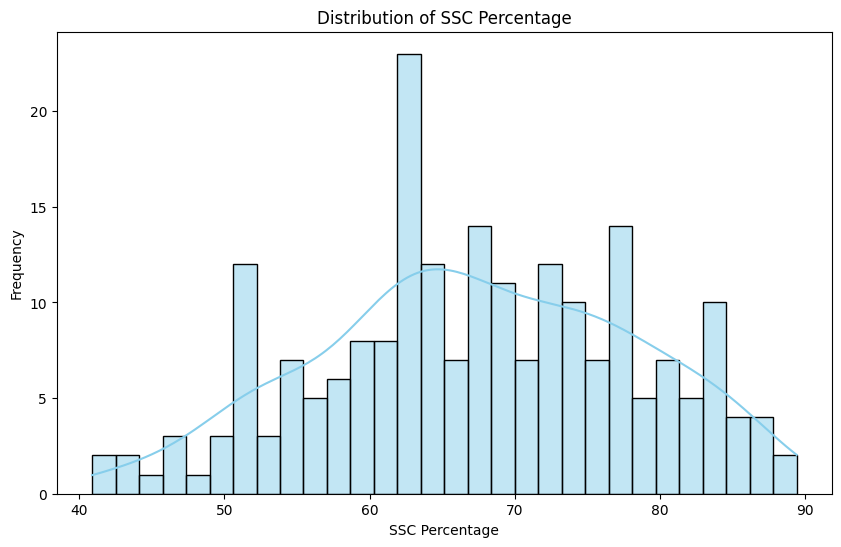

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data1['ssc_p'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of SSC Percentage')
plt.xlabel('SSC Percentage')
plt.ylabel('Frequency')
plt.show()

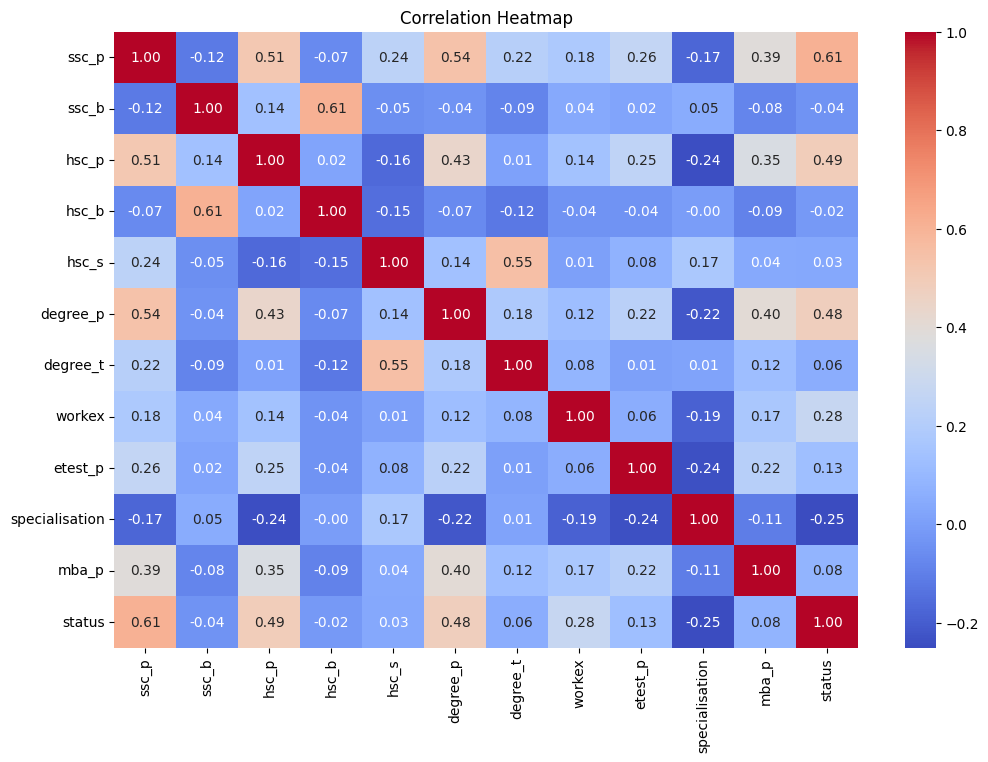

In [ ]:
# Visualizing the correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

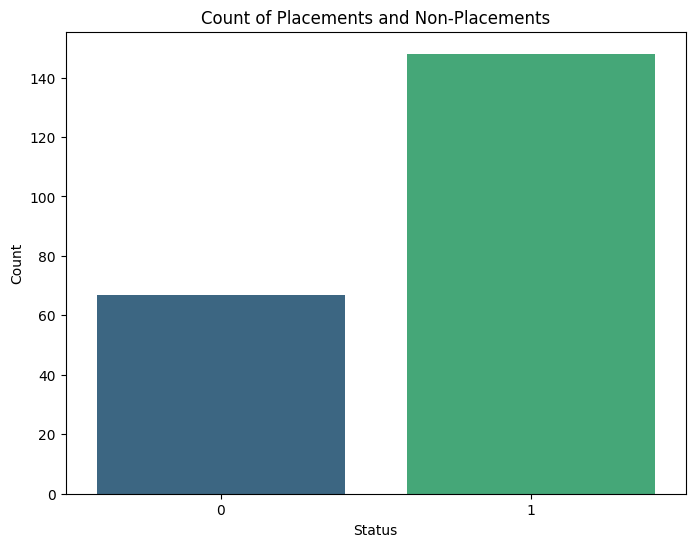

In [ ]:
# Visualizing the count of placements and non-placements
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=data1, palette='viridis')
plt.title('Count of Placements and Non-Placements')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


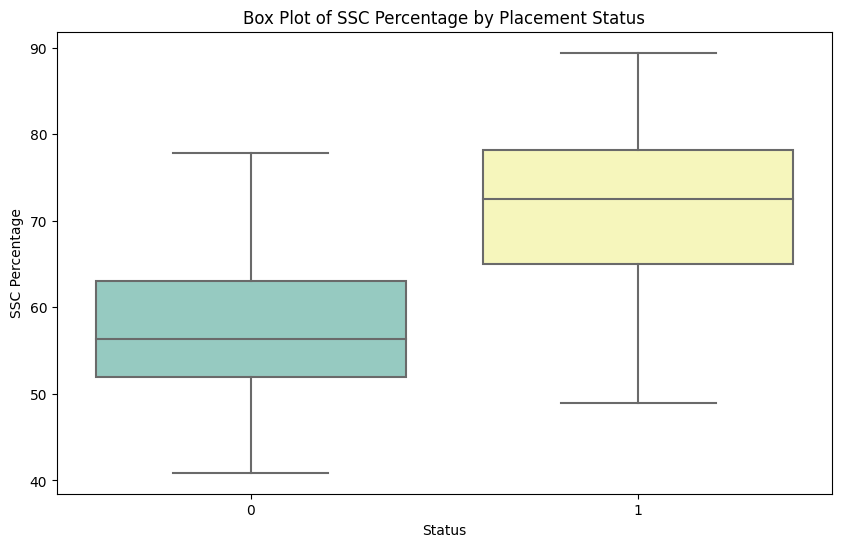

In [ ]:
# Visualizing the distribution of 'ssc_p' with respect to placement status
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='ssc_p', data=data1, palette='Set3')
plt.title('Box Plot of SSC Percentage by Placement Status')
plt.xlabel('Status')
plt.ylabel('SSC Percentage')
plt.show()


***DATA SPLITTING***

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
data1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,1
1,M,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,1
2,M,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,1
3,M,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43,0
4,M,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50,1


In [ ]:
data1['gender']=data1['gender'].map({'M':0, 'F':1})
data1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,1
1,0,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,1
2,0,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,1
3,0,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43,0
4,0,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50,1


In [ ]:
X1 = data1.drop('status',axis=1)
Y1 = data1['status']

In [ ]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size=0.20,random_state=42)

In [ ]:
#Logistic regression
lr  = LogisticRegression()
lr.fit(X1_train,Y1_train)

LogisticRegression()

In [ ]:
#SUPPORT VECTOR MACHINE
s = svm.SVC()
s.fit(X1_train,Y1_train)

SVC()

In [ ]:
#K-NEAREST NEIGBOUR
knn = KNeighborsClassifier()
knn.fit(X1_train,Y1_train)

KNeighborsClassifier()

In [ ]:
#DECISION TREE CLASSIFIER
dt = DecisionTreeClassifier()
dt.fit(X1_train,Y1_train)

DecisionTreeClassifier()

In [ ]:
#REANDOM FOREST
rf = RandomForestClassifier()
rf.fit(X1_train,Y1_train)

RandomForestClassifier()

In [ ]:
#GRADIENT BOOSTING
gd = GradientBoostingClassifier()
gd.fit(X1_train,Y1_train)

GradientBoostingClassifier()

In [ ]:
Y_predict1 = lr.predict(X1_test)
Y_predict2 = s.predict(X1_test)
Y_predict3 = knn.predict(X1_test)
Y_predict4 = dt.predict(X1_test)
Y_predict5 = rf.predict(X1_test)
Y_predict6 = gd.predict(X1_test)

In [ ]:
score_lr = accuracy_score(Y1_test,Y_predict1)
score_svm = accuracy_score(Y1_test,Y_predict2)
score_knn = accuracy_score(Y1_test,Y_predict3)
score_dt = accuracy_score(Y1_test,Y_predict4)
score_rf = accuracy_score(Y1_test,Y_predict5)
score_gd = accuracy_score(Y1_test,Y_predict6)

In [ ]:
print("Accuracy of LR = ",score_lr*100)
print("Accuracy of SVM = ",score_svm*100)
print("Accuracy of KNN = ",score_knn*100)
print("Accuracy of DT = ",score_dt*100)
print("Accuracy of RF = ",score_rf*100)
print("Accuracy of GD = ",score_gd*100)

Accuracy of LR =  88.37209302325581
Accuracy of SVM =  76.74418604651163
Accuracy of KNN =  79.06976744186046
Accuracy of DT =  83.72093023255815
Accuracy of RF =  81.3953488372093
Accuracy of GD =  81.3953488372093


In [ ]:
new_data = pd.DataFrame({
    'gender':0,
    'ssc_p':67.0,
    'ssc_b':0,
    'hsc_p':91.0,
    'hsc_b':0,
    'hsc_s':1,
    'degree_p':58.0,
    'degree_t':2,
    'workex':0,
    'etest_p':55.0,
     'specialisation':1,
    'mba_p':58.8,
},index=[0])

In [ ]:
lr= LogisticRegression()
lr.fit(X1,Y1)

LogisticRegression()

In [ ]:
p=lr.predict(new_data)
prob=lr.predict_proba(new_data)
if p==1:
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed")

Placed
You will be placed with probability of 0.97


In [ ]:
import joblib

In [ ]:
joblib.dump(lr,'placement_lrmodel')

['placement_lrmodel']

In [ ]:
model = joblib.load('placement_lrmodel')

In [ ]:
model.predict(new_data)

array([1])